In [1]:
import os
import json
import pandas as pd
from tqdm import tqdm
from glob import glob

import torch
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [66]:
root_path = "/home/rz/data/lock3dface/dataset_1028_new/test_set/*/*.png"
# root_path = "/home/rz/data/lock3dface/dataset_1028_new/train_set/*/*.png"
files = glob(root_path)
print(len(files))

11100


/home/rz/data/lock3dface/dataset_1028_new/test_set/531_Kinect_FE_1DEPTH/21_depth_normal.png
(128, 128)


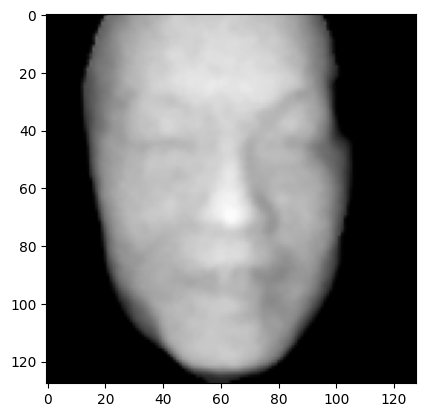

In [67]:
print(files[0])
img = cv.imread(files[0], flags=cv.IMREAD_UNCHANGED)[:, :, 0]
print(img.shape)
plt.imshow(img[:, :, None].repeat(3, axis=2))

In [68]:
path = "./data/lock3dface_num2id.json"
with open(path, 'r') as f:
    num2id = json.load(f)

In [69]:
items = []
save_root_path = "/home/mnt/rz_mnt/depth-face-mae/lock3dface/test_set"
for f in tqdm(files):
    try:
        img_path = f
        img = cv.imread(f, flags=cv.IMREAD_UNCHANGED)[:, :, 0]
        save_dir = os.path.join(save_root_path, f.split("/")[-2])
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        save_path = os.path.join(save_dir, f.split("/")[-1])
        cv.imwrite(save_path, img)
    except Exception as e:
        print(f, e)

100%|██████████| 11100/11100 [00:30<00:00, 359.62it/s]


In [ ]:
dataset = {
    "train": [],
    "val": [],
}
path = "/home/mnt/rz_mnt/depth-face-mae/lock3dface/train_set/*/*.png"
files = glob(path)
for f in tqdm(files):
    dir_name = f.split("/")[-2]
    num = int(dir_name[:3])
    label = num2id[num]
    item = {"img_path": f, "label": label, "subset": }

  0%|          | 0/312275 [00:00<?, ?it/s]

143 129


In [44]:
files[0]

'/home/mnt/rz_mnt/depth-face-mae/lock3dface/train_set/143_Kinect_FE_1DEPTH/24_depth_normal.png'

In [2]:
root_path = "/home/czj/BFM2019_large/*/*.png"
dummy_files = glob(root_path)
print(len(dummy_files))

4920000


In [10]:
# dataset = {
#     "train": [],
#     "val": [],
# }
# path = "/home/mnt/rz_mnt/depth-face-mae/lock3dface/train_set/*/*.png"
# files = glob(path)
items = []
for f in tqdm(dummy_files):
    dir_name = f.split("/")[-2]
    label = int(dir_name) + 600
    # label = num2id[num]
    item = {"img_path": f, "label": label, "subset": "BFM2019_large", "is_TM": False, "val_subset_label": 5}
    items.append(item)
len(items)

100%|██████████| 4920000/4920000 [00:06<00:00, 815359.23it/s]


4920000

In [11]:
items[0]

{'img_path': '/home/czj/BFM2019_large/09611/24_yaw_-40_depth_normal.png',
 'label': 10211,
 'subset': 'BFM2019_large',
 'is_TM': False,
 'val_subset_label': 5}

In [7]:
with open("./data/lock3dface.json", 'r') as f:
    data = json.load(f)

In [12]:
data["train"].extend(items)

In [ ]:
with open("./data/lock3dface_and_bfm_large.json")

/home/czj/BFM2019_large/09611/24_yaw_-40_depth_normal.png


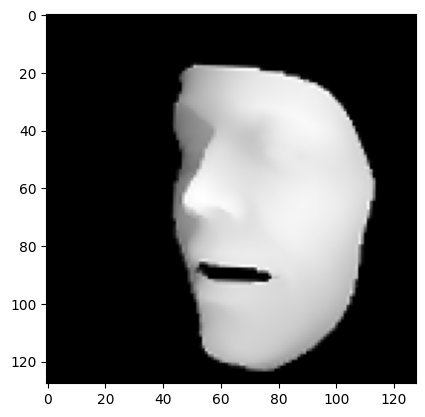

In [26]:
print(dummy_files[0])
img = cv.imread(dummy_files[0], flags=cv.IMREAD_UNCHANGED)
img.shape
plt.imshow(img[:, :, None].repeat(3, axis=2))

In [34]:
path = "./data/lock3dface.json"
with open(path, 'r') as f:
    data = json.load(f)

In [14]:
lock3dface_subsets = {"NU": 0, "FE": 1, "PS": 2, "OC": 3, "TM": 4}
for _, subset in data.items():
    for x in tqdm(subset):
        x["val_subset_label"] = lock3dface_subsets["TM"] if x["is_TM"] else lock3dface_subsets[x["subset"]]

100%|██████████| 11100/11100 [00:00<00:00, 1997887.59it/s]


In [35]:
data["val"][0]

{'img_path': '/home/mnt/rz_mnt/depth-face-mae/lock3dface/test_set/531_Kinect_FE_1DEPTH/21_depth_normal.png',
 'label': 463,
 'subset': 'FE',
 'is_TM': False,
 'val_subset_label': 1}

In [27]:
with open(path, 'w') as f:
    json.dump(data, f)

In [30]:
path = "/home/rz/code/deep-denoising/datafiles/gallery_1028_new.txt"
items = []
with open(path, 'r') as f:
    for line in f:
        items.append(line.strip())

In [39]:
new_items = []
for item in items:
    item = item.replace("/home/rz/data/lock3dface/dataset_1028_new/", "/home/mnt/rz_mnt/depth-face-mae/lock3dface/")
    new_items.append(item)

In [44]:
gallery = []
for item in new_items:
        dir_name = item.split("/")[-2]
        num = int(dir_name[:3])
        label = num2id[num]
        tmp = {"img_path": item, "label": label}
        gallery.append(tmp)

In [51]:
with open("./data/lock3dface.json", 'r') as f:
    data = json.load(f)

In [58]:
data["gallery"] = gallery

In [60]:
data.keys()

dict_keys(['train', 'val', 'gallery'])

In [59]:
with open('./data/lock3dface.json', 'w') as f:
    json.dump(data, f)

In [55]:
with open("./data/lock3dface_num2id.json", 'w') as f:
    json.dump(num2id, f)

In [2]:
import yaml
from datasets import datasets
from torch.utils.data import DataLoader
from models.util.depth_map_utils import batch_calc_normal_map
from models import models
import matplotlib.pyplot as plt

In [ ]:
# path = "./configs/train_vit_mae_pretraing.yaml"
path = "./configs/train_vit_fine_tuning.yaml"
with open(path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
train_set = datasets.make(config["dataset"]["train_set"])

In [5]:
loader = DataLoader(train_set, batch_size=4, shuffle=False)

In [10]:
x = next(iter(loader))[0]

In [13]:
y = torch_calc_normal_map(x, 0, 1)

In [25]:
y = (y - y.min()) / (y.max() - y.min())

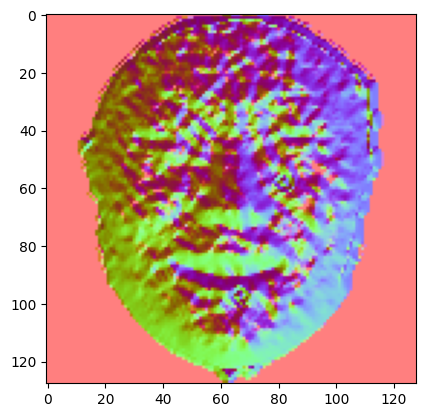

In [26]:
img = y[0].permute(1, 2, 0).numpy()
plt.imshow(img)

In [6]:
path = "./configs/train_vit_fine_tuning.yaml"
with open(path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [7]:
model = models.make(config["model"])

Missing keys in checkpoint: {'head.bias', 'head.weight'}
Unexpected keys in checkpoint: {'decoder_blocks.1.mlp.fc1.weight', 'decoder_blocks.7.mlp.fc2.bias', 'decoder_blocks.7.norm1.weight', 'decoder_blocks.5.attn.qkv.bias', 'decoder_blocks.4.attn.proj.bias', 'decoder_blocks.6.norm2.bias', 'decoder_blocks.2.attn.qkv.weight', 'decoder_blocks.4.norm1.bias', 'decoder_blocks.3.norm2.bias', 'decoder_blocks.5.norm2.weight', 'decoder_blocks.0.norm1.weight', 'mask_token', 'decoder_blocks.5.attn.qkv.weight', 'decoder_blocks.1.attn.proj.bias', 'decoder_blocks.4.attn.qkv.weight', 'decoder_blocks.1.norm1.weight', 'decoder_blocks.6.attn.qkv.bias', 'decoder_blocks.0.attn.proj.weight', 'decoder_blocks.4.attn.qkv.bias', 'decoder_blocks.4.mlp.fc1.weight', 'decoder_blocks.5.norm2.bias', 'decoder_blocks.7.mlp.fc2.weight', 'decoder_blocks.0.norm1.bias', 'decoder_blocks.3.norm1.weight', 'decoder_blocks.1.attn.proj.weight', 'decoder_norm.weight', 'decoder_blocks.7.mlp.fc1.bias', 'decoder_pos_embed', 'decoder

In [13]:
names = []
for n, p in model.named_parameters():
    names.append(n)

In [14]:
names

['model.cls_token',
 'model.pos_embed',
 'model.patch_embed.proj.weight',
 'model.patch_embed.proj.bias',
 'model.blocks.0.norm1.weight',
 'model.blocks.0.norm1.bias',
 'model.blocks.0.attn.qkv.weight',
 'model.blocks.0.attn.qkv.bias',
 'model.blocks.0.attn.proj.weight',
 'model.blocks.0.attn.proj.bias',
 'model.blocks.0.norm2.weight',
 'model.blocks.0.norm2.bias',
 'model.blocks.0.mlp.fc1.weight',
 'model.blocks.0.mlp.fc1.bias',
 'model.blocks.0.mlp.fc2.weight',
 'model.blocks.0.mlp.fc2.bias',
 'model.blocks.1.norm1.weight',
 'model.blocks.1.norm1.bias',
 'model.blocks.1.attn.qkv.weight',
 'model.blocks.1.attn.qkv.bias',
 'model.blocks.1.attn.proj.weight',
 'model.blocks.1.attn.proj.bias',
 'model.blocks.1.norm2.weight',
 'model.blocks.1.norm2.bias',
 'model.blocks.1.mlp.fc1.weight',
 'model.blocks.1.mlp.fc1.bias',
 'model.blocks.1.mlp.fc2.weight',
 'model.blocks.1.mlp.fc2.bias',
 'model.blocks.2.norm1.weight',
 'model.blocks.2.norm1.bias',
 'model.blocks.2.attn.qkv.weight',
 'model.b